In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("D:\Projects\Elevate\Task 1\Titanic-Dataset.csv")

In [3]:
# Show first few rows
print("🔹 Dataset Head:")
print(df.head())

🔹 Dataset Head:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   N

In [4]:
# Basic statistics: mean, median, std, min, max, quartiles
print("\n🔹 Summary Statistics:")
print(df.describe())


🔹 Summary Statistics:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [5]:
# Median for each column
print("\n🔹 Median Values:")
print(df.median(numeric_only=True))


🔹 Median Values:
PassengerId    446.0000
Survived         0.0000
Pclass           3.0000
Age             28.0000
SibSp            0.0000
Parch            0.0000
Fare            14.4542
dtype: float64


In [6]:
# Checking if any nulls remain
print("\n🔹 Null Value Count:")
print(df.isnull().sum())


🔹 Null Value Count:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64



📊 Histograms for numeric features:


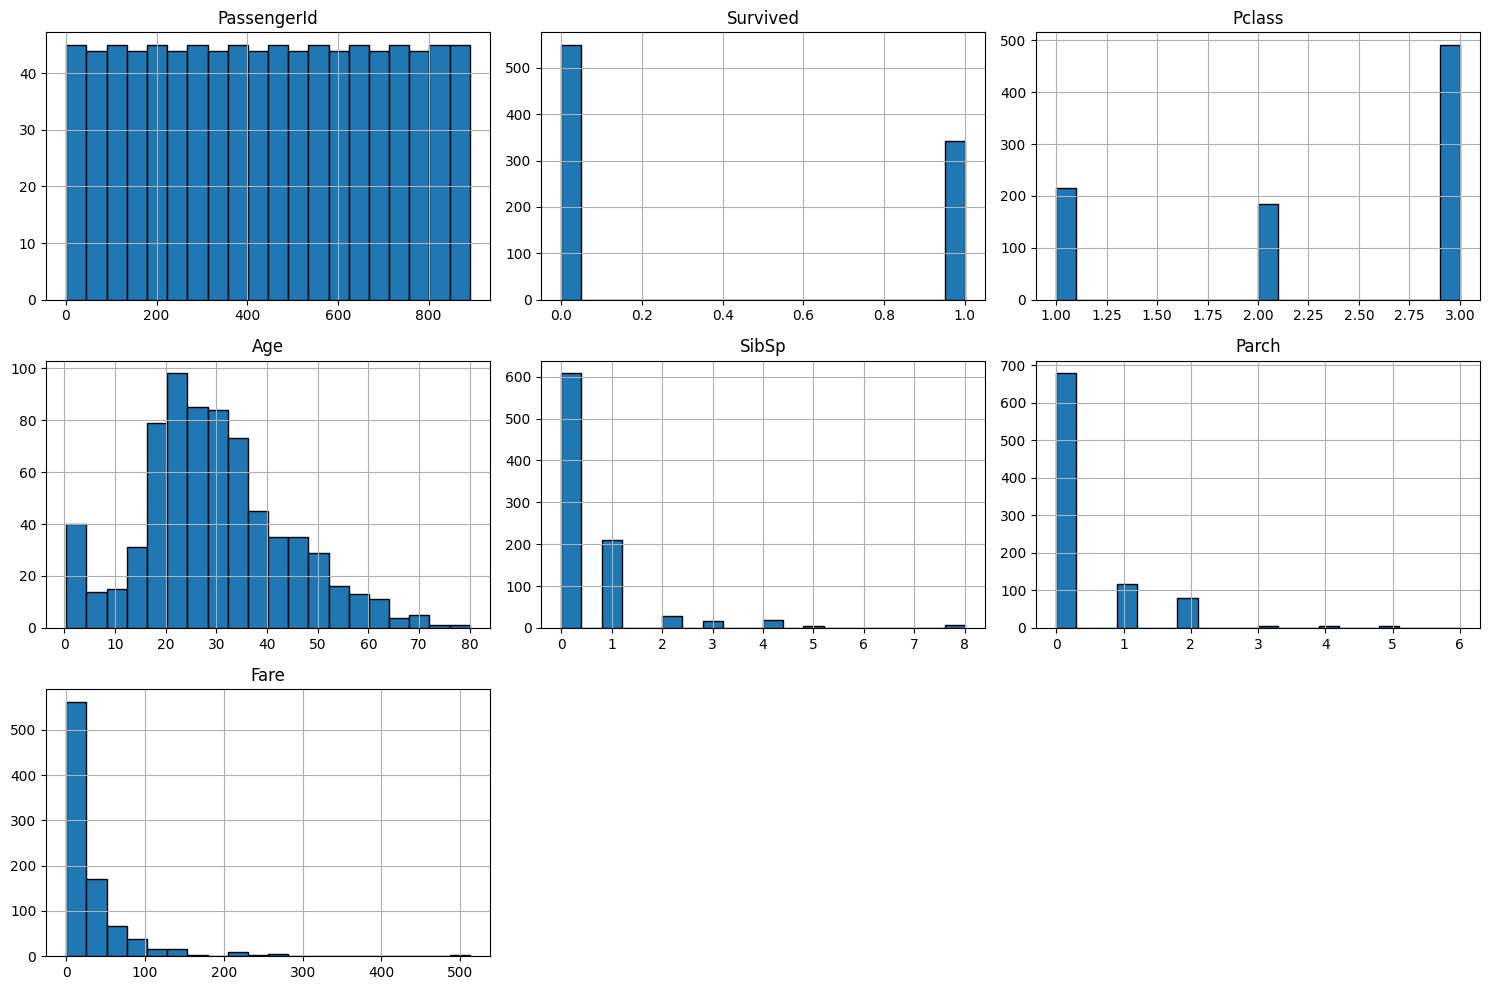


📦 Boxplots for numeric features:


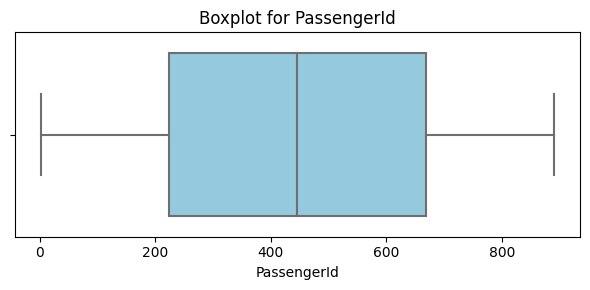

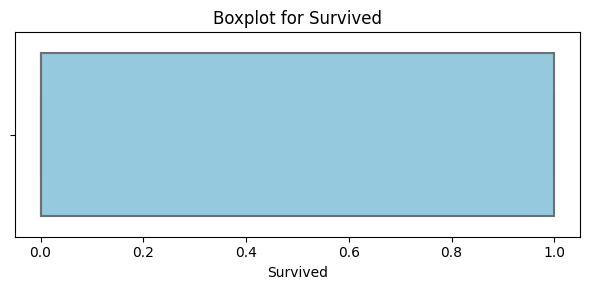

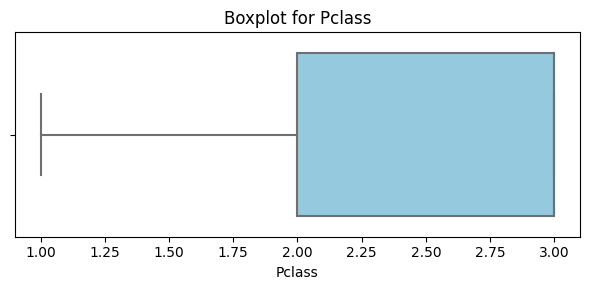

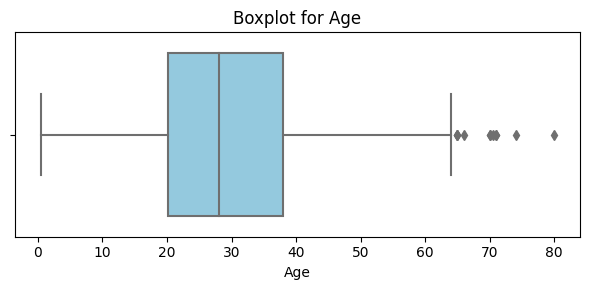

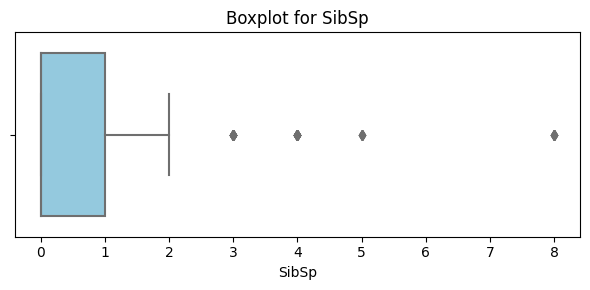

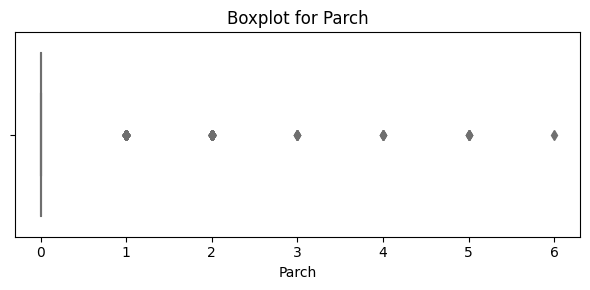

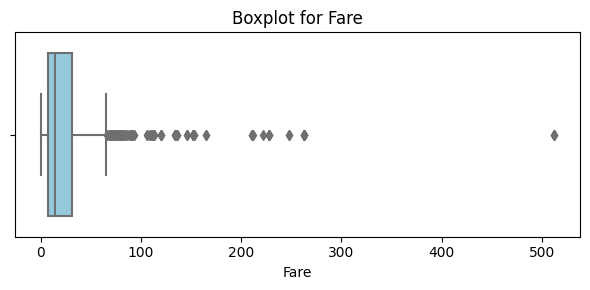

In [7]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Histograms
print("\n📊 Histograms for numeric features:")
df[numeric_cols].hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.tight_layout()
plt.show()

# Boxplots
print("\n📦 Boxplots for numeric features:")
for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(data=df, x=col, color='skyblue')
    plt.title(f'Boxplot for {col}')
    plt.tight_layout()
    plt.show()


🔗 Pairplot (partial view):


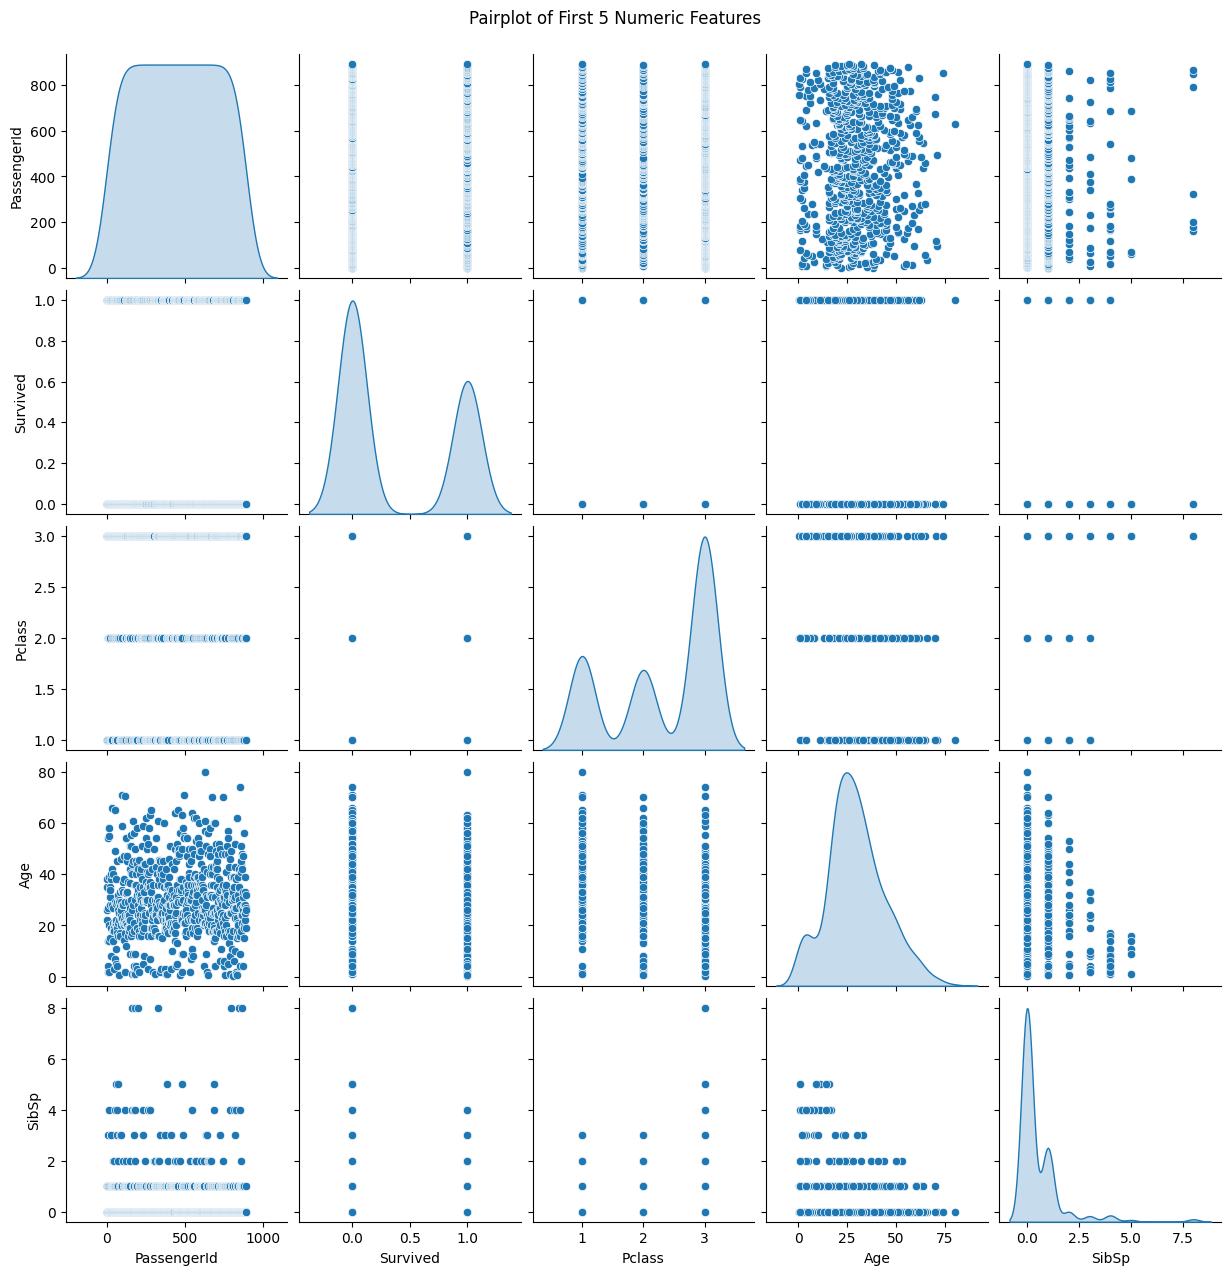


📈 Correlation Matrix:


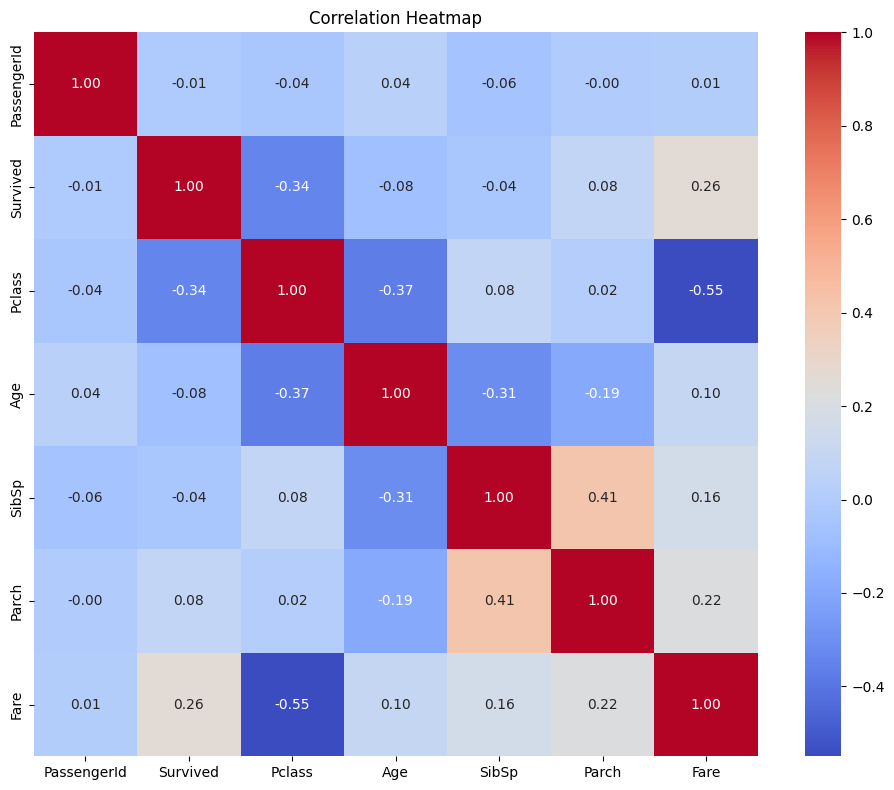

In [8]:
# Pairplot (only first 5 numeric columns for readability)
print("\n🔗 Pairplot (partial view):")
sns.pairplot(df[numeric_cols[:5]], diag_kind='kde')
plt.suptitle("Pairplot of First 5 Numeric Features", y=1.02)
plt.show()

# Correlation matrix
print("\n📈 Correlation Matrix:")
corr_matrix = df[numeric_cols].corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


📌 Features with high correlation (> 0.7):
Empty DataFrame
Columns: []
Index: []

🔁 Skewness in features:
PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64


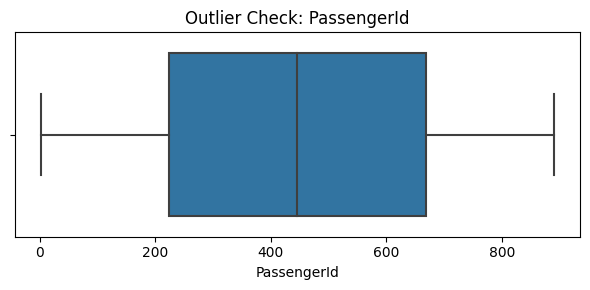

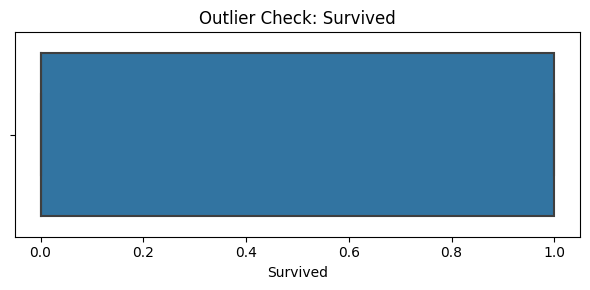

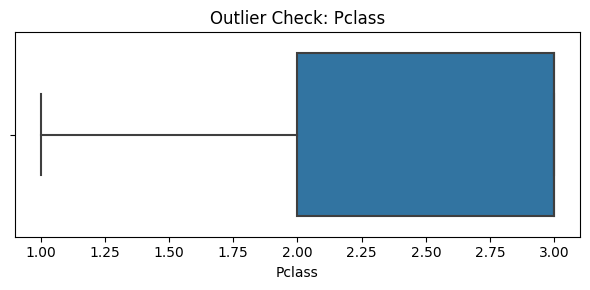

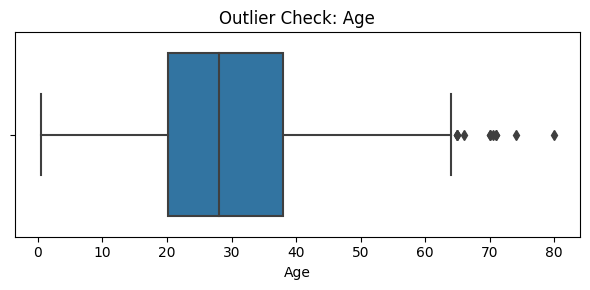

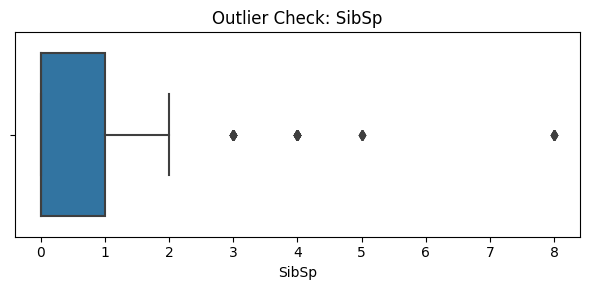

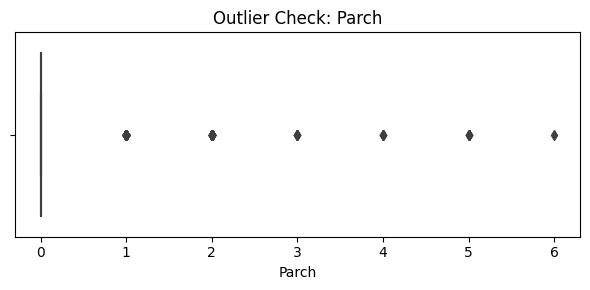

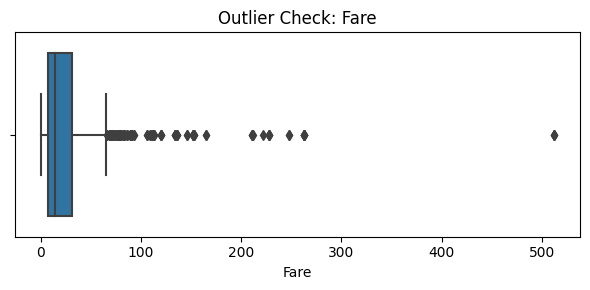

In [9]:
# High correlation features
high_corr = corr_matrix[(corr_matrix > 0.7) & (corr_matrix < 1.0)]
print("\n📌 Features with high correlation (> 0.7):")
print(high_corr.dropna(how='all').dropna(axis=1, how='all'))

# Checking skewness
print("\n🔁 Skewness in features:")
print(df[numeric_cols].skew())

# Visualize outliers again (if any still present)
for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(data=df, x=col)
    plt.title(f'Outlier Check: {col}')
    plt.tight_layout()
    plt.show()

In [20]:
# 5. Skewness Detection
skewness = df[numeric_cols].skew()
print("\n🔹 Skewness of Numerical Features:")
print(skewness)


🔹 Skewness of Numerical Features:
PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64
